In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision

In [3]:
import set_data as sd

# load train set, test set

X_train, Y_train, X_test, Y_test = sd.set_data("data/combined_total_data_1")
print(X_train[0], Y_train[0])

x_train = Variable(X_train)
y_train = Variable(Y_train)


tensor([-0.2904, -0.6558,  0.2619,  1.5265, -0.8838,  1.3313,  0.9538,  0.2107,
         0.8753, -0.3144, -1.4738, -1.0943, -0.8747, -0.0122, -1.2993,  1.5285,
        -1.4652, -0.9095, -0.9493,  0.2172,  0.8782, -0.4555,  0.9523,  0.2168,
         0.8789, -1.5887, -1.6440, -0.6523], dtype=torch.float64) tensor([-1.8803], dtype=torch.float64)


In [4]:
# regression model

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(28, 64) #input dim = 28, hidden = 128
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 10)
        self.drop2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(10, 5)
        self.drop3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(5, 1)
        

    def forward(self, x):
        a = F.relu(self.fc1(x))
        a = self.drop1(a)
        a = F.relu(self.fc2(a))
        a = self.drop2(a)
        a = F.relu(self.fc3(a))
        a = self.drop3(a)
        a = self.fc4(a)
        
        return a

In [5]:
# train

epochs = 30
learningrate = 0.01

model = RegressionModel()
criterion = nn.SmoothL1Loss(size_average = True) 
optimizer = torch.optim.Adam(model.parameters(), lr=learningrate)

print('\nStart Training...\n')

loss_graph = []
for epoch in range(epochs+1):
    # forward pass
    pred_y = model(x_train.float())
    

    # compute and print loss
    loss = criterion(pred_y.double(), y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_graph.append(loss.item())
    
    if epoch % 10 == 0:
        print ('epoch [{}/{}], loss {}'.format(epoch, epochs, loss.item())) # or loss item
    


Start Training...



/nfs/home/kit7777777t/anaconda3/envs/LENNA/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


epoch [0/30], loss 0.16219501739827963
epoch [10/30], loss 0.047118534998091315
epoch [20/30], loss 0.03874450603897746
epoch [30/30], loss 0.033846772647649584


In [6]:
torch.save(model.state_dict(), "./lenna0.pth")

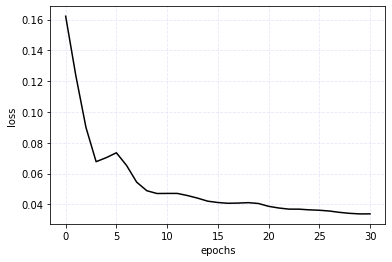

In [7]:
fig = plt.figure()
plt.plot(range(epochs+1), loss_graph, label = 'loss', color = 'black')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(linestyle = '--', color = 'lavender')
plt.show()

In [8]:
x_test = Variable(X_test)
y_test = Variable(Y_test)

model.eval()
y_pred = model(x_test.float())
after_train = criterion(y_pred.double(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.0964340327909631


In [9]:
new_model= RegressionModel()
new_model.load_state_dict(torch.load('./lenna0.pth'))
    
new_model.eval()

RegressionModel(
  (fc1): Linear(in_features=28, out_features=64, bias=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (drop2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
  (drop3): Dropout(p=0.1, inplace=False)
  (fc4): Linear(in_features=5, out_features=1, bias=True)
)